# Independent test selection 

For creation of a robust independent test set, a selection of HIV drugs which are most dissimilar from the average structure 


Imports & installations 

In [25]:
!pip install rdkit-pypi
!pip install pubchempy


import pandas as pd 
import numpy as np
import pubchempy as pcp
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt


In [26]:
class independent_test_selection:
    
    ''' Used to select the most dissimilar drugs for use in the independent test set '''
    def __init__(self, fingerprint_path, drugname_path): 
        self.fingerprints = np.load(fingerprint_path, allow_pickle=True)
        self.names = np.load(drugname_path, allow_pickle=True)
        
    
    def get_similarity_to_mean_fingerprint(self):
        
        # Calculate the mean fingerprint as an abstract representation of the average molecule structure within the dataset 
        mean_fingerprint = self.fingerprints.mean(axis=0)
        
        def euclidean_distance(vector1, vector2):
            return np.linalg.norm(vector1 - vector2)
        
        # Calculate Euclidean distance for each vector
        euclidean_distances = np.array([euclidean_distance(vector, mean_fingerprint) for vector in self.fingerprints])
        euclidean_distances = euclidean_distances.reshape(25,1)


        # Combine with names and sort in order of similarity to mean fingerprint 
        sort_idx = np.argsort(euclidean_distances[:,0])
        self.sim_to_mean = np.hstack((self.names, euclidean_distances))[sort_idx, :]
        self.sim_to_mean[7, 0] = 'Tenofovir Disoproxil fumarate' # Rename from Tenofovir-DF to allow smiles structure 
        
        # Seperate ordered drug names and scores 
        self.names =  self.sim_to_mean[:,0]
        self.sim_to_mean =  self.sim_to_mean[:,1]
        
        
    def visualize_with_similarity_to_mean(self): 
        def get_smiles(molecule_name):
            ''' Gets SMILES structure for a given molecule '''
            try:
                compounds = pcp.get_compounds(molecule_name, 'name')
                smiles = compounds[0].to_dict(properties=['canonical_smiles'])['canonical_smiles']
                return smiles
            except Exception as e:
                print(f"Failed to retrieve SMILES for molecule {molecule_name}: {str(e)}")
                return None


        # Get SMILES strings for each molecule name
        smiles_list = [get_smiles(name) for name in self.names]

        # Create RDKit molecule objects from the SMILES strings
        mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles is not None]


        # Plot all molecules together with similarity to mean vector 
        num_mols = len(mols)
        fig, axes = plt.subplots(5, 5, figsize=(12, 12), dpi=300)

        for i, ax in enumerate(axes.flatten()):
            if i < num_mols:
                mol = mols[i]
                AllChem.Compute2DCoords(mol)
                img = Draw.MolToImage(mol, size=(200, 200))
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(self.names[i] + ': ' + str(np.round(self.sim_to_mean[i],2)))

        # Adjust layout
        plt.tight_layout()
        plt.show()


        
    


Initiate, load drugs and fingerprings 

In [27]:
# Setting paths to drugs and their fingerprints 
fingerprint_path = "C:/Users\moham\OneDrive\Documents\hiv_fingerprints_clean.npy"
drugname_path = 'C:/Users\moham\OneDrive\Documents\hiv_names.npy'

ITS = independent_test_selection(fingerprint_path, drugname_path)


Find mean fingerprint representing the average structure of the dataset 

In [28]:
ITS.get_similarity_to_mean_fingerprint()


Visualize and plot, the independent dataset shall be selected from the most dissimilar molecules 

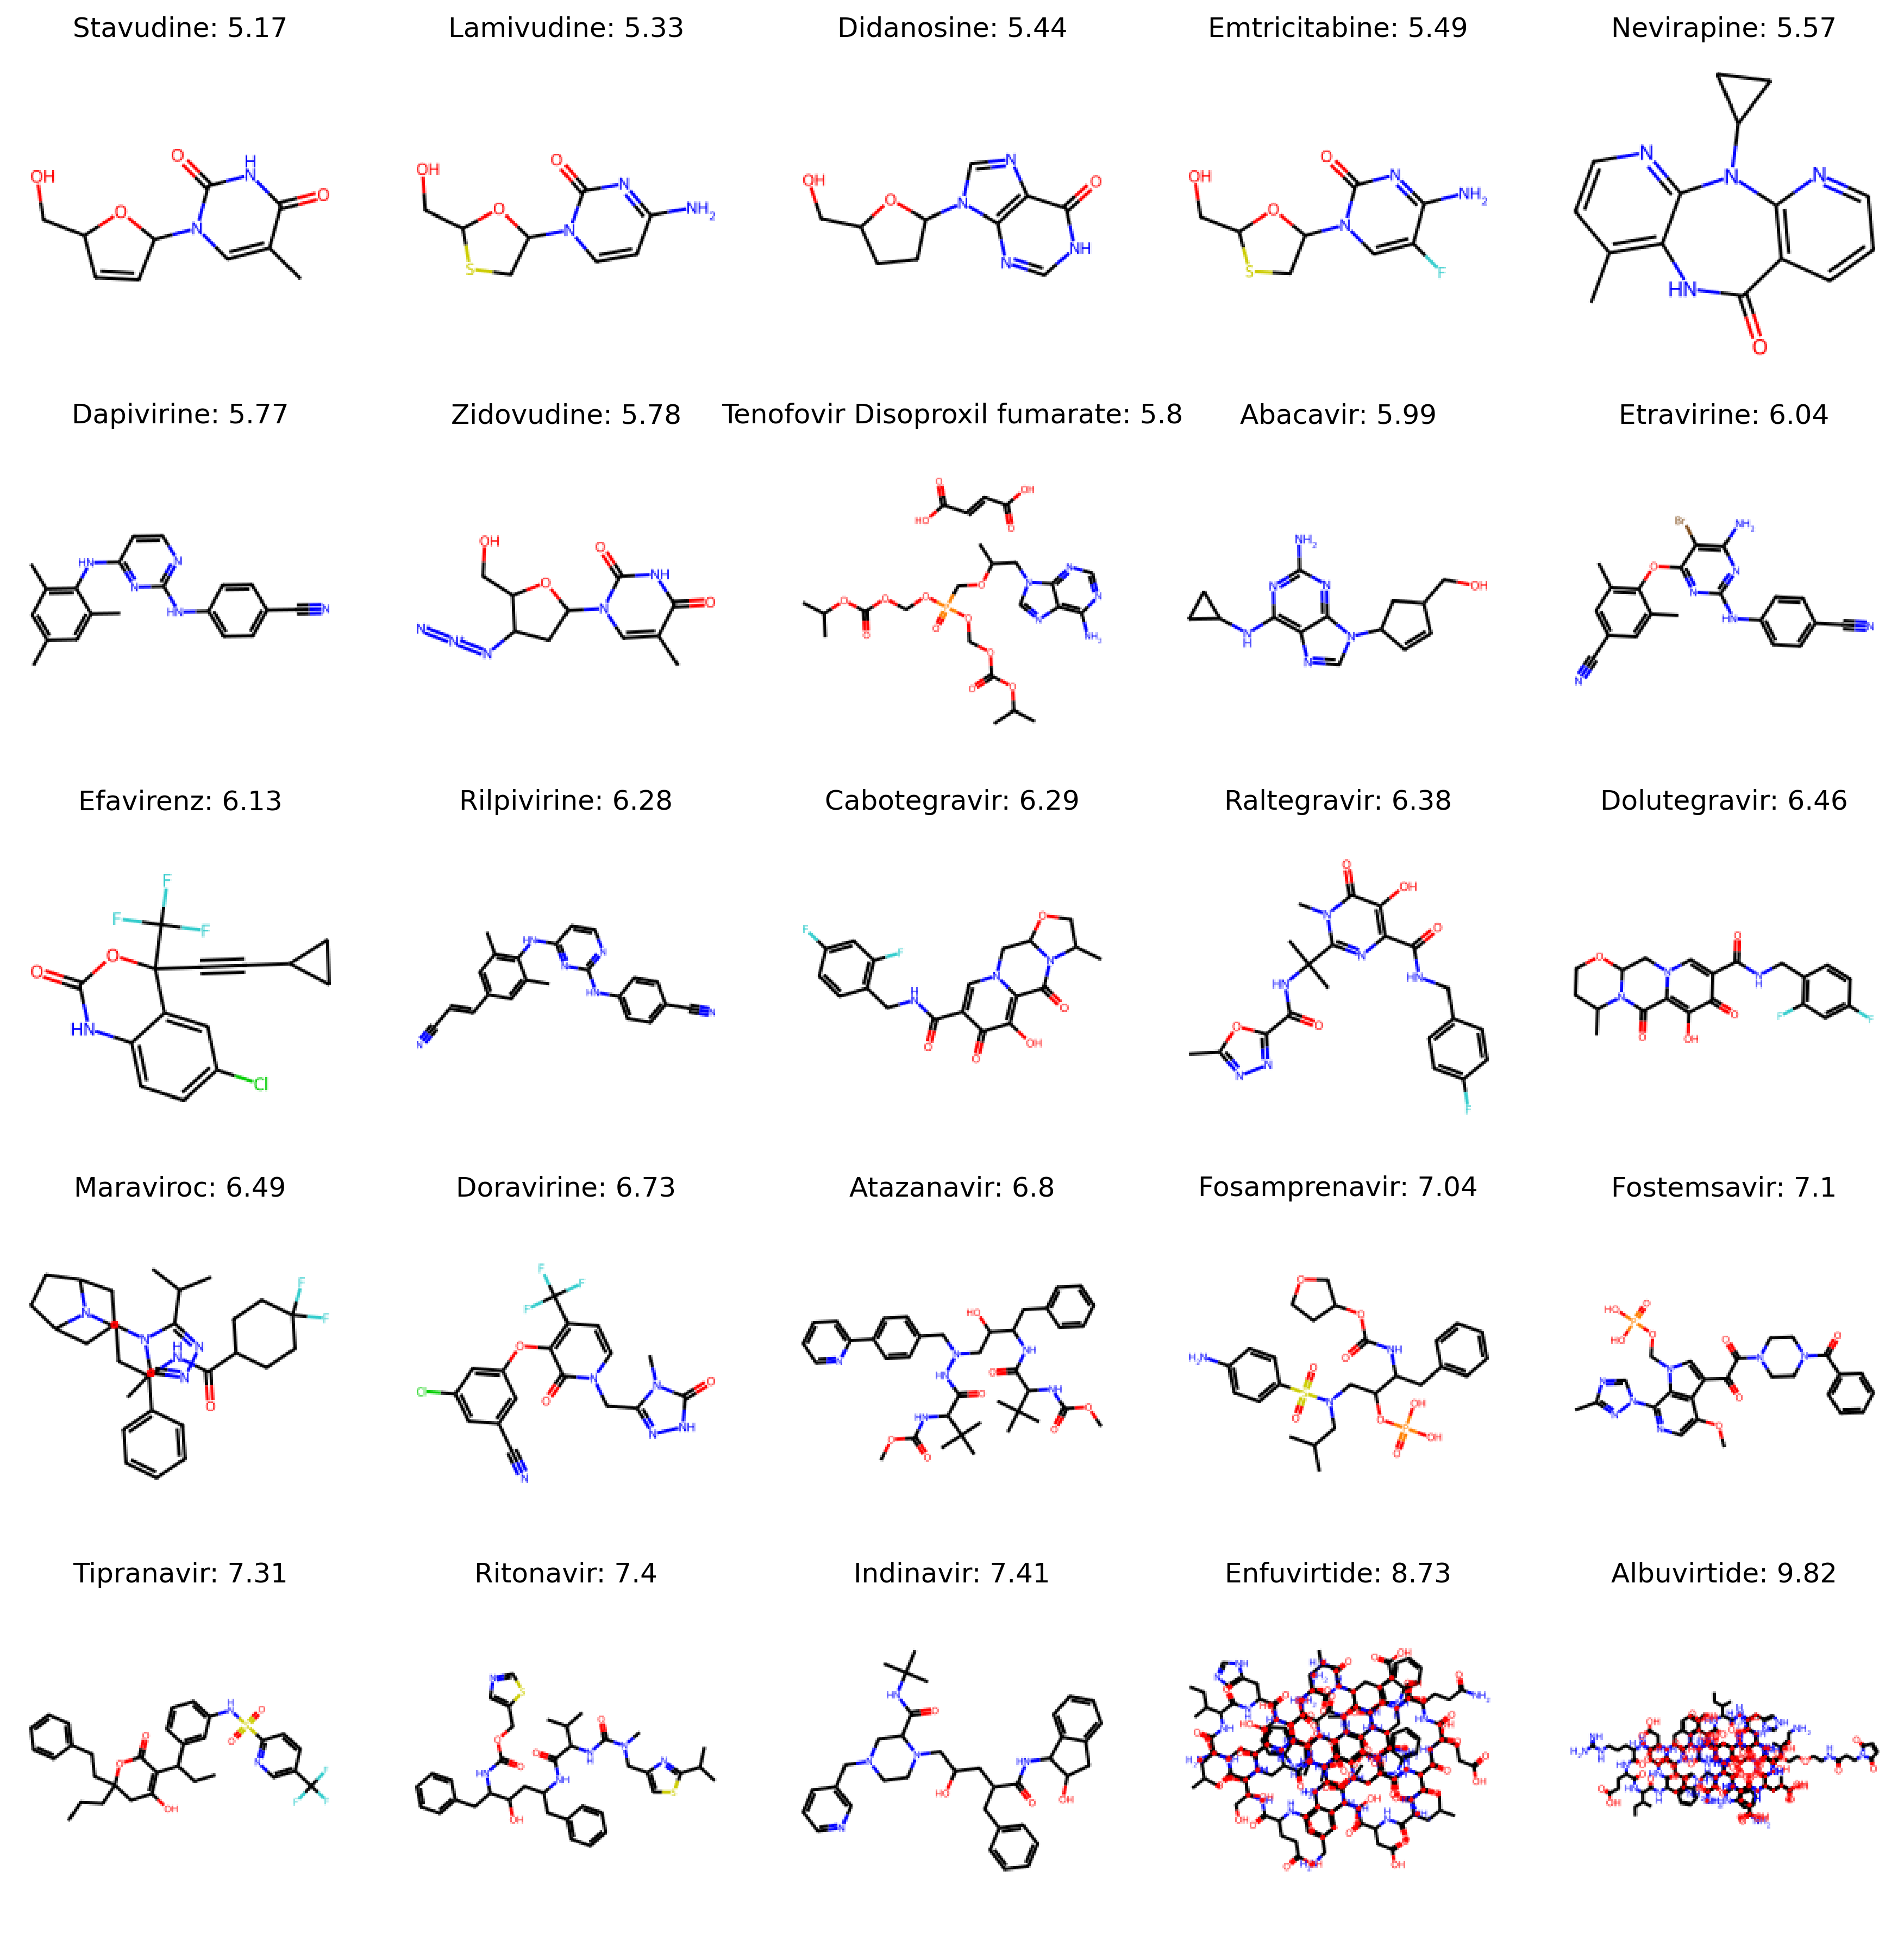

In [29]:
ITS.visualize_with_similarity_to_mean()